## 取得資料

In [ ]:
# 載入需要的套件
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
# 取得tensorflow中內建的cifar10資料集
cifar10 = tf.keras.datasets.cifar10

# 載入資料集，其中包含訓練用的資料、標籤與測試用的資料、標籤
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)
(50000, 1) [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(10000, 1)


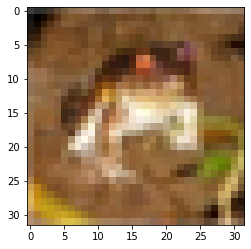

In [ ]:
# 看一下資料集的形狀
print(x_train.shape)
print(y_train.shape, y_train)
print(y_test.shape)

# 把資料集中的圖片印出來看看
plt.imshow(x_train[0], cmap='binary' )

In [ ]:
# 對輸入資料做處理
x_train = x_train / 255
x_test = x_test / 255

## 建立模型

In [ ]:
# 先建立既有模型
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(32, 32, 3),
    include_top=False)

base_model.summary()

# 擷取模型中的元件，並使用Moddel API重組成新的model
base_model = tf.keras.Model(
    inputs=base_model.inputs,
    outputs=base_model.get_layer(name='block3_conv3').output,
    name='VGG16_block_1_to_3')

# 將既有權重更新關掉
base_model.trainable = False

# 使用tf.keras中的循序模型(Sequential)模組來建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 列出模型的結構與順序
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [ ]:
# 為模型加上訓練用的結構
# 使用adam做訓練，以SparseCategoricalCrossentropy當作
# 訓練過程中，使用準確率當作顯示的指標
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 訓練與評估模型

In [ ]:
# 訓練模型
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.25)

Epoch 1/20
1172/1172 [==============================] - 14s 5ms/step - loss: 2.3299 - accuracy: 0.3863 - val_loss: 1.1559 - val_accuracy: 0.5958
Epoch 2/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1472 - accuracy: 0.5956 - val_loss: 1.0502 - val_accuracy: 0.6339
Epoch 3/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.0383 - accuracy: 0.6336 - val_loss: 1.0236 - val_accuracy: 0.6388
Epoch 4/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9945 - accuracy: 0.6502 - val_loss: 0.9773 - val_accuracy: 0.6566
Epoch 5/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9532 - accuracy: 0.6651 - val_loss: 0.9884 - val_accuracy: 0.6502
Epoch 6/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9380 - accuracy: 0.6716 - val_loss: 0.9515 - val_accuracy: 0.6673
Epoch 7/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9219 - accuracy: 0.6817 - val_loss: 0.9732 - val_accuracy

In [ ]:
# 進行fine-tune
# 解除特徵擷取的訓練限制
base_model.trainable = True

# 給予比平常還小的learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 進行微調
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=30,
                    validation_split=0.25)

Epoch 1/30
1172/1172 [==============================] - 13s 10ms/step - loss: 0.7899 - accuracy: 0.7241 - val_loss: 0.7815 - val_accuracy: 0.7289
Epoch 2/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.7034 - accuracy: 0.7546 - val_loss: 0.7262 - val_accuracy: 0.7453
Epoch 3/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.6586 - accuracy: 0.7683 - val_loss: 0.6946 - val_accuracy: 0.7567
Epoch 4/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.6221 - accuracy: 0.7798 - val_loss: 0.7235 - val_accuracy: 0.7486
Epoch 5/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.6011 - accuracy: 0.7877 - val_loss: 0.6573 - val_accuracy: 0.7706
Epoch 6/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.5717 - accuracy: 0.8003 - val_loss: 0.6452 - val_accuracy: 0.7750
Epoch 7/30
1172/1172 [==============================] - 12s 10ms/step - loss: 0.5507 - accuracy: 0.8100 - val_loss: 0.6198 -

In [ ]:
# 評估模型
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5722 - accuracy: 0.8117


[0.5722455382347107, 0.8116999864578247]

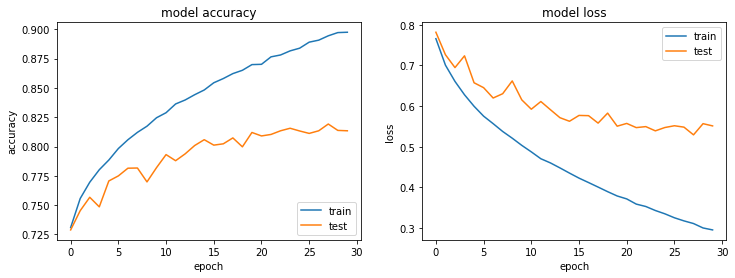

In [ ]:
# 繪製圖表
# 設定圖表大小
plt.figure(figsize=(12, 4))

# 選定1列2行第1張
plt.subplot(1,2,1)
# 畫上兩條線
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 設定圖表名稱與圖例
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
# 使用tf.keras中的循序模型(Sequential)模組來建立模型
CAM_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
  base_model,
  tf.keras.layers.Conv2D(64, 1, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(10, 1, padding='same', activation='softmax')
])

CAM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
VGG16_block_1_to_3 (Function (None, 8, 8, 256)         1735488   
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 64)          16448     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 10)          650       
Total params: 1,752,586
Trainable params: 1,752,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 抓出相應的layer，並檢查weight的shape
dense = model.get_layer(name='dense')
dense_1 = model.get_layer(name='dense_1')
conv2d = CAM_model.get_layer(name='conv2d')
conv2d_1 = CAM_model.get_layer(name='conv2d_1')

print(len(dense.get_weights()))
print(len(conv2d.get_weights()))

print(dense.get_weights()[0].shape)
print(conv2d.get_weights()[0].shape)

print(dense.get_weights()[1].shape)
print(conv2d.get_weights()[1].shape)

2
2
(256, 64)
(1, 1, 256, 64)
(64,)
(64,)


In [ ]:
# 嘗試轉換dense weight的shape，使其符合conv2d的weight shape
print(np.array([[dense.get_weights()[0]]]).shape)

# 移植weight
conv2d.set_weights([
    np.array([[dense.get_weights()[0]]]) ,
    dense.get_weights()[1]])

# 移植weight
conv2d_1.set_weights([
    np.array([[dense_1.get_weights()[0]]]) ,
    dense_1.get_weights()[1]])

(1, 1, 256, 64)


6 [6]


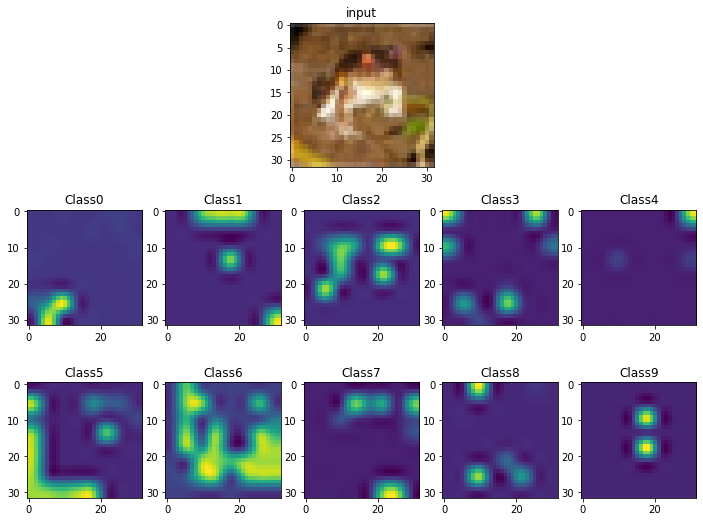

In [ ]:
# 取得一個可以餵入模型的樣本
index = 0
sample = np.array([x_train[index]])
label = y_train[index]

# 判斷其類別，並產生CAM
predict_class = np.argmax(model.predict(sample))
pridict_map = CAM_model.predict(sample)
print(predict_class, label)

# 設定圖表大小
plt.figure(figsize=(12, 9))

#  繪製原圖
plt.subplot(3,1,1)
plt.title('input')
plt.imshow(sample[0], cmap='binary' )

# 繪製各張map
for i in range(10):
  plt.subplot(3,5,6+i)
  plt.title('Class' + str(i))
  img = pridict_map[0][:,:,i]
  img = cv2.resize(img, (32,32), interpolation=cv2.INTER_CUBIC)
  plt.imshow(img)
  
  